<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="assets/LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong>CC3106 - Responsible AI
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Proyecto 1:</strong> Identificación y Mitigación de Sesgos en Modelos de Machine Learning
</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autor:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Mario Antonio Guerra Morales - <strong>21008</strong></li>
        <li>Kristopher Javier Alvarado López - <strong>21188</strong></li>
        <li>Daniel Adolfo Sarmiento Peralta - <strong>231105</strong></li>
      </ul>
    </td>
  </tr>
</table>

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

FIG_DIR = Path("docs/assets/figures")
DL_DIR = Path("docs/assets/downloads")
FIG_DIR.mkdir(parents=True, exist_ok=True)
DL_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


You should consider upgrading via the 'c:\users\alvar\onedrive\documentos\semestrex\responsibleai\bias-mitigation-ml\.venv\scripts\python.exe -m pip install --upgrade pip' command.


## 🔍 Análisis Exploratorio 

In [4]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [17]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
print(adult.variables) 


              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [18]:
print(X)
print(y)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [6]:
df = pd.concat([X, y], axis=1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Análisis Exploratorio y limpieza de datos

In [7]:
df.info()
df.describe(include="all")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

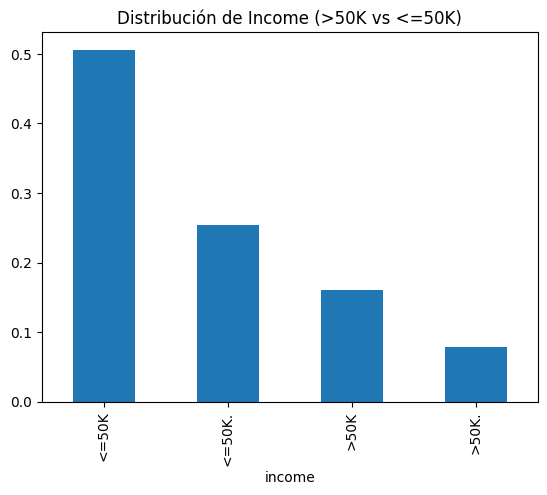

Valores únicos originales en income:
['<=50K' '>50K' '<=50K.' '>50K.']

Valores únicos después de limpieza:
['<=50K' '>50K']


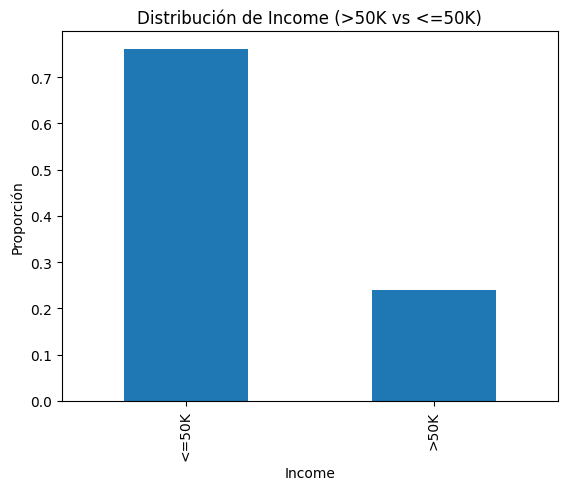

In [9]:
df['income'].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribución de Income (>50K vs <=50K)")
plt.show()

# --- LIMPIEZA DE LA VARIABLE income ---

# Revisar valores únicos originales
print("Valores únicos originales en income:")
print(df['income'].unique())

# 1. Convertir todo a mayúsculas para evitar problemas de 'K' vs 'k'
# 2. Eliminar espacios en blanco extra al inicio/fin (strip)
# 3. Eliminar puntos '.' que aparecen en algunos valores
df['income'] = df['income'].str.upper().str.strip().str.replace('.', '', regex=False)

# Revisar valores únicos después de la limpieza
print("\nValores únicos después de limpieza:")
print(df['income'].unique())

# --- VISUALIZACIÓN DE LA DISTRIBUCIÓN ---
df['income'].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribución de Income (>50K vs <=50K)")
plt.ylabel("Proporción")
plt.xlabel("Income")
plt.show()


In [14]:
# =========================================================
# LIMPIEZA DE VARIABLES CATEGÓRICAS (Adult Census Income)
# =========================================================

import numpy as np
import pandas as pd

# -----------------------------
# 1) Normalizar la variable TARGET (income)
#    - Mayúsculas, sin espacios extra, sin puntos
#    - Validar que queden solo dos categorías
# -----------------------------
if 'income' in df.columns:
    print("Valores únicos originales en income:", df['income'].unique())
    df['income'] = (
        df['income']
        .astype(str)
        .str.upper()
        .str.strip()
        .str.replace('.', '', regex=False)   # elimina puntos al final
    )
    # A veces aparece '>50k' en minúscula; ya quedó en mayúsculas
    # Verificación
    print("Valores únicos tras limpieza income:", df['income'].unique())
    assert set(df['income'].unique()) <= {">50K", "<=50K"}, "Income tiene valores fuera de {>50K, <=50K}"

# -----------------------------
# 2) Lista de variables categóricas a limpiar
#    (además de sex, race, education que ya exploraste)
# -----------------------------
cat_cols = ["workclass", "marital-status", "occupation", "relationship", "native-country"]

# -----------------------------
# 3) Reemplazar "?" por NaN y limpiar espacios
# -----------------------------
for col in cat_cols:
    # Mostrar un vistazo previo
    print(f"\n[{col}] valores únicos (antes):", df[col].unique()[:15], "...")
    # Limpieza genérica
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()                # quita espacios al inicio/fin
        .replace({"?": np.nan})     # "?" -> NaN (faltante real)
    )
    # Mostrar un vistazo posterior
    print(f"[{col}] valores únicos (después):", df[col].dropna().unique()[:15], "...")
    print(f"[{col}] faltantes después:", df[col].isna().sum())

# -----------------------------
# 4) Reagrupar países poco frecuentes en "Other"
#    - Define el umbral por conteo ABSOLUTO o por PROPORCIÓN
#    - Recomendación: usar conteo para Adult (dataset grande)
# -----------------------------
COUNTRY_MIN_COUNT = 200  # <-- puedes ajustar: 100/200/500 según el nivel de agregación deseado

if "native-country" in df.columns:
    country_counts = df["native-country"].value_counts(dropna=True)
    common_countries = country_counts[country_counts >= COUNTRY_MIN_COUNT].index

    # Mantén NaN como NaN; las categorías raras se etiquetan como "Other"
    df["native-country"] = df["native-country"].where(df["native-country"].isna() | df["native-country"].isin(common_countries), "Other")

    print("\nResumen native-country tras agrupación:")
    print(df["native-country"].value_counts(dropna=False).head(15))
    print(f"Total países 'comunes': {len(common_countries)}")
    print(f"Registros etiquetados como 'Other': {(df['native-country'] == 'Other').sum()}")

# -----------------------------
# 5) Chequeo rápido de consistencia
#    - Top categorías por columna
# -----------------------------
print("\n=== Top categorías por variable (post-limpieza) ===")
for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(10)
    print(f"\n{col}:\n{vc}")

# -----------------------------
# 6) (Opcional) Guardar dataset limpio para seguir EDA/modelado
#    Usa el DL_DIR que definiste al inicio del notebook
# -----------------------------
try:
    out_path = DL_DIR / "adult_clean.csv"
    df.to_csv(out_path, index=False)
    print(f"\n✅ Dataset limpio guardado en: {out_path}")
except Exception as e:
    print("\nNota: no se guardó el CSV porque DL_DIR no existe en este entorno. Error:", e)


Valores únicos originales en income: ['<=50K' '>50K']
Valores únicos tras limpieza income: ['<=50K' '>50K']

[workclass] valores únicos (antes): ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan] ...
[workclass] valores únicos (después): ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked' 'nan'] ...
[workclass] faltantes después: 1836

[marital-status] valores únicos (antes): ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] ...
[marital-status] valores únicos (después): ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] ...
[marital-status] faltantes después: 0

[occupation] valores únicos (antes): ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving

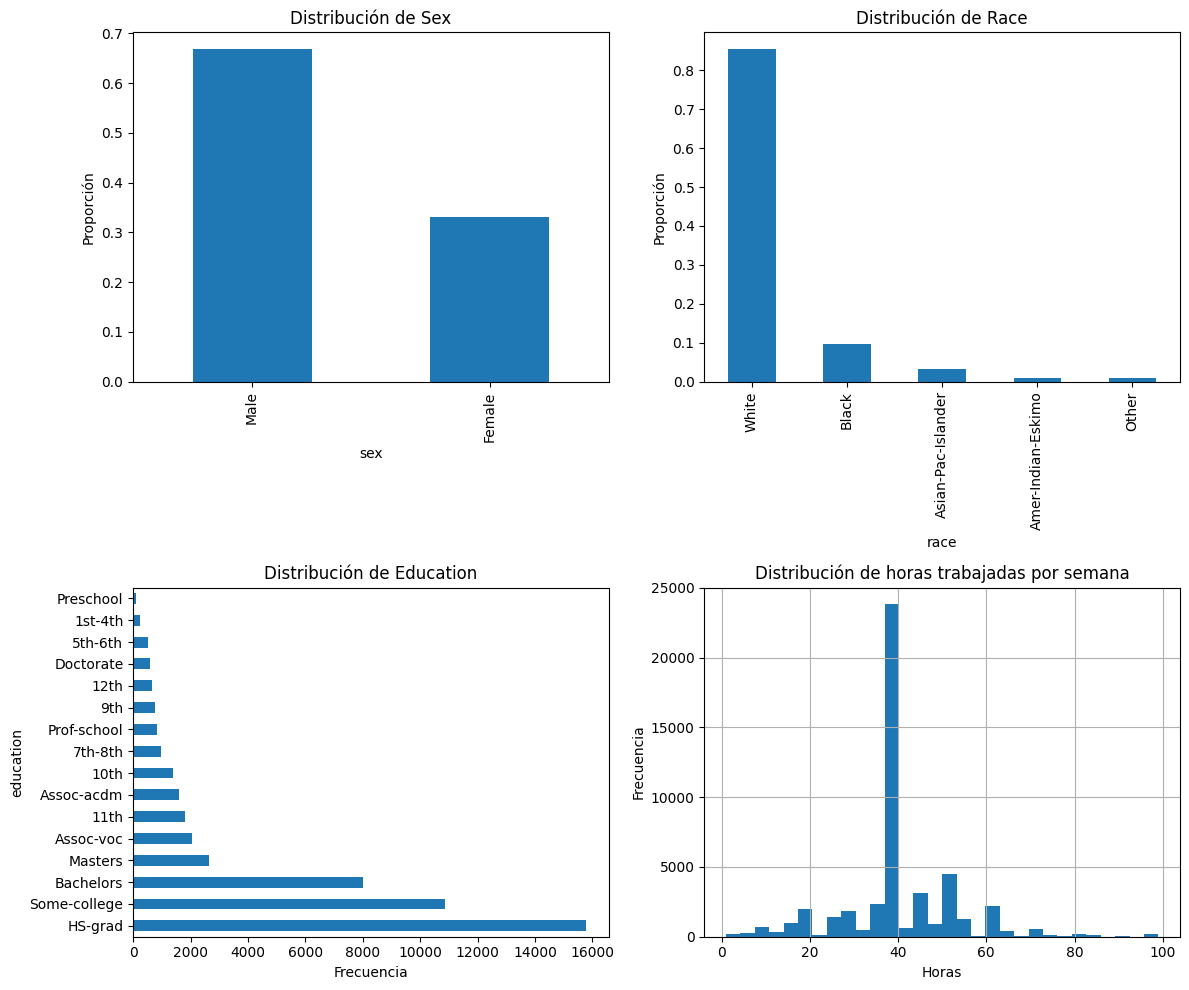

In [20]:
# --- GRÁFICAS EN GRID 2x2 ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas x 2 columnas

# --- Sexo ---
df['sex'].value_counts(normalize=True).plot(kind="bar", ax=axes[0,0])
axes[0,0].set_title("Distribución de Sex")
axes[0,0].set_ylabel("Proporción")

# --- Raza ---
df['race'].value_counts(normalize=True).plot(kind="bar", ax=axes[0,1])
axes[0,1].set_title("Distribución de Race")
axes[0,1].set_ylabel("Proporción")

# --- Educación ---
df['education'].value_counts().plot(kind="barh", ax=axes[1,0])
axes[1,0].set_title("Distribución de Education")
axes[1,0].set_xlabel("Frecuencia")

# --- Horas por semana ---
df['hours-per-week'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title("Distribución de horas trabajadas por semana")
axes[1,1].set_xlabel("Horas")
axes[1,1].set_ylabel("Frecuencia")

plt.tight_layout()  # Ajusta los espacios entre gráficos
plt.show()



--- WORKCLASS ---
Valores únicos:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked' 'nan']

Frecuencia (top 10):
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
NaN                  1836
Self-emp-inc         1695
Federal-gov          1432
nan                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64
--------------------------------------------------

--- MARITAL-STATUS ---
Valores únicos:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Frecuencia (top 10):
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
-----------------------------------

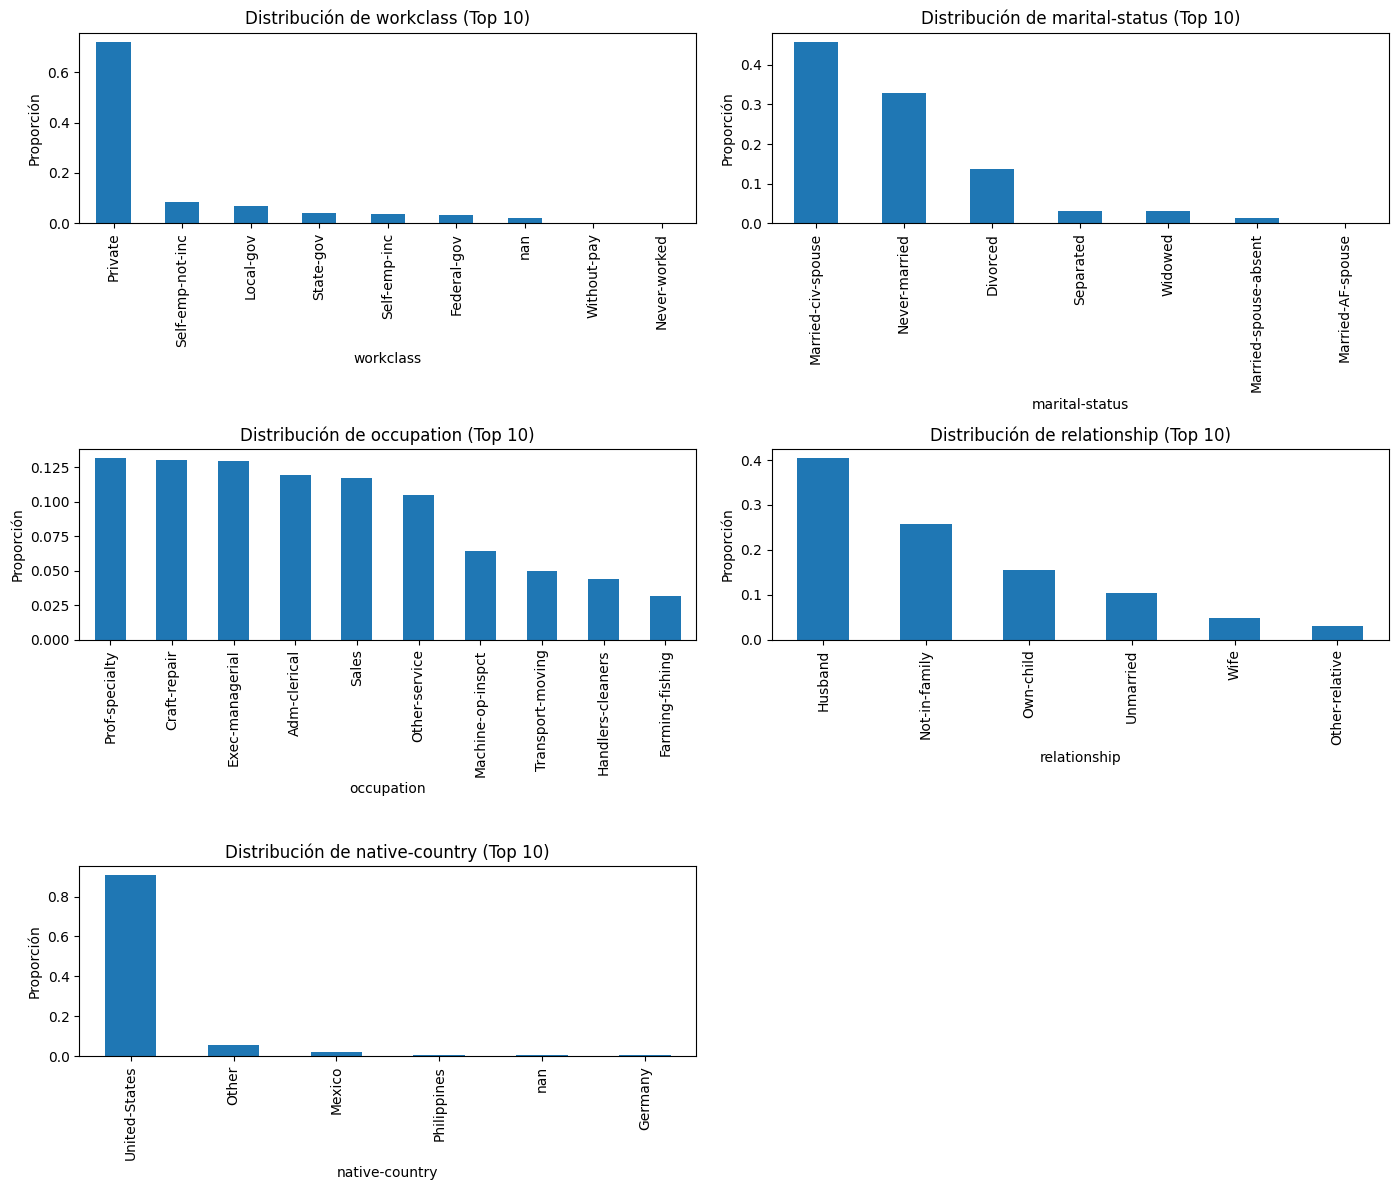

In [19]:
# --- LISTA DE VARIABLES CATEGÓRICAS A REVISAR ---
categorical_vars = ["workclass", "marital-status", "occupation", "relationship", "native-country"]

for col in categorical_vars:
    print(f"\n--- {col.upper()} ---")
    print("Valores únicos:")
    print(df[col].unique())  # revisar categorías diferentes
    
    print("\nFrecuencia (top 10):")
    print(df[col].value_counts(dropna=False).head(10))  # top categorías más frecuentes
    
    print("-"*50)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    df[col].value_counts(normalize=True).head(10).plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Distribución de {col} (Top 10)")
    axes[i].set_ylabel("Proporción")

# Ocultar subplot vacío (porque tenemos 5 variables, no 6)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# Identificación de posibles sesgos

🔎 1. Sexo (Sex)

Distribución: ~67% hombres, 33% mujeres.

Posible sesgo:

- El dataset está desbalanceado → el modelo puede aprender más de patrones masculinos que femeninos.

- Estudios previos muestran que la tasa de ingresos >50K es mucho mayor en hombres.

- Riesgo: que el modelo aprenda una relación “ser hombre → más ingresos”.

🔎 2. Raza (Race)

Distribución: ~85% blancos, minorías con muy poca representación (ej. Amer-Indian-Eskimo <1%).

Posible sesgo:

- Los grupos minoritarios están subrepresentados → el modelo tendrá poca información para ellos.

- Esto puede generar predicciones menos confiables y potencialmente discriminatorias hacia esos grupos.

🔎 3. Educación (Education)

Distribución: fuerte concentración en HS-grad, Some-college y Bachelors.

Posible sesgo:

- Los niveles bajos de educación tienen muy pocos ejemplos → el modelo puede sobreajustar.

- Esto refuerza la idea de que “más educación → más ingresos”, que aunque correlaciona, no debería ser usado como único criterio.

# Creación del modelo base

# Evaluación del sesgo en el modelo